In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

### Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation

In [2]:
# 1.1 import csv
custDf = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
custDf

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# 1.2 check datatype
custDf.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [4]:
#1.3 summary
custDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
# 1.4 shape
custDf.shape

(5000, 14)

In [6]:
# 1.5 null values
custDf.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### EDA

In [7]:
# 2.1 number of unique values in each column
custDf.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [8]:
# 2.2 Number of people with zero mortgage
print("Number of people with zero mortgage = ",custDf[custDf['Mortgage'] == 0].shape[0])

Number of people with zero mortgage =  3462


In [9]:
#2.3 Number of people with zero credit card spending
print("Number of people with zero credit card spending = ",custDf[custDf['CCAvg'] == 0].shape[0])

Number of people with zero credit card spending =  106


In [10]:
#2.4.1 Value of count of all catergorical columns
edValCnt = custDf['Education'].value_counts().sort_values()
print(edValCnt)

2    1403
3    1501
1    2096
Name: Education, dtype: int64


In [11]:
#2.4.2 Value count of securities account
print(custDf['Securities Account'].value_counts().sort_values())

1     522
0    4478
Name: Securities Account, dtype: int64


In [12]:
#2.4.2 Value count of CD Account
print(custDf['CD Account'].value_counts().sort_values())

1     302
0    4698
Name: CD Account, dtype: int64


In [13]:
#2.4.3 Value count of Online Account
print(custDf['Online'].value_counts().sort_values())

0    2016
1    2984
Name: Online, dtype: int64


In [14]:
#2.4.4 Value count of Credit Card
print(custDf['CreditCard'].value_counts().sort_values())

1    1470
0    3530
Name: CreditCard, dtype: int64


In [15]:
#2.4.4 Value count of Family
print(custDf['Family'].value_counts().sort_values())

3    1010
4    1222
2    1296
1    1472
Name: Family, dtype: int64


### 2.5 Univariate Analysis

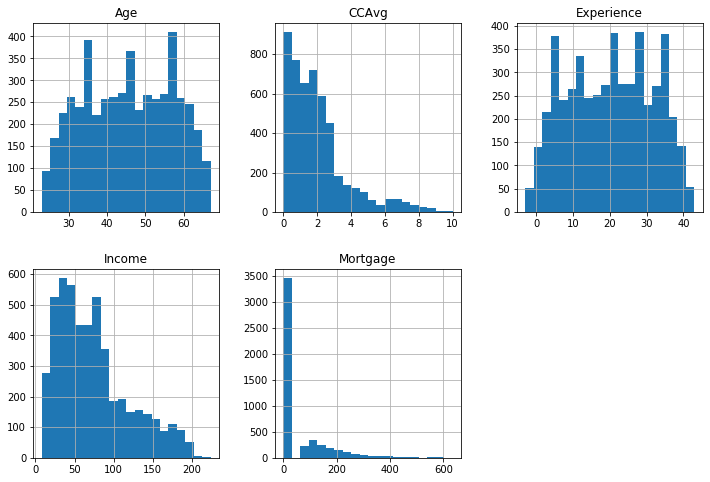

In [16]:
#2.5 Univariate plots of continous variables
custDf[['Age','Experience','Income','Mortgage','CCAvg']].hist(figsize=(12,8),layout=(2,3),bins=20);

In [17]:
custDf[custDf['Experience'] < 0]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1


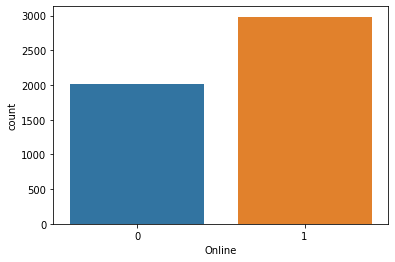

In [18]:
sns.countplot(custDf.Online);

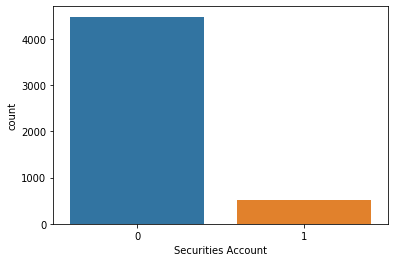

In [19]:
sns.countplot(custDf['Securities Account']);

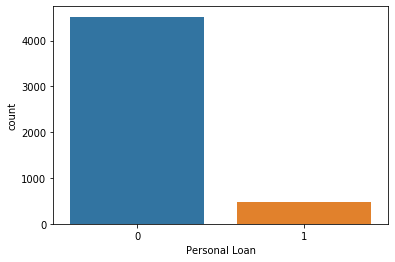

In [20]:
sns.countplot(custDf['Personal Loan']);

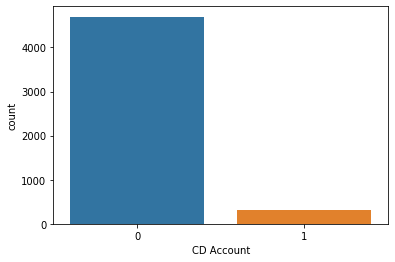

In [21]:
sns.countplot(custDf['CD Account']);

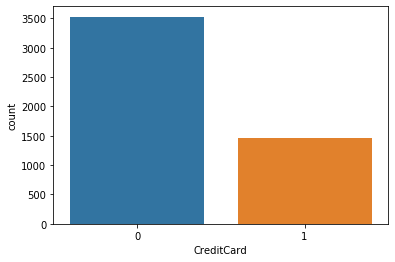

In [22]:
sns.countplot(custDf['CreditCard']);

In [23]:
# Convert the columns to categorical values
custDf['Securities Account'] = custDf['Securities Account'].astype('category')
custDf['CD Account']         = custDf['CD Account'].astype('category')
custDf['Online']             = custDf['Online'].astype('category')
custDf['CreditCard']         = custDf['CreditCard'].astype('category')
custDf['Family']             = custDf['Family'].astype('category')
custDf['Education']          = custDf['Education'].astype('category')

#### Univariate analysis Insights:
        1. There are no missing values
        2. But the experience has some negative values which are converted to positive values
        3. Zip code does not provide any information, so it can be dropped
        4. The mortgage amount seems to be skewed as there are only few people with highermortgage.
        5. Similarly CCAvg is also bit skewed.

### 2.5 Bivariate Analysis

([<matplotlib.axis.YTick at 0x26bed2cc748>,
 <a list of 8 Text yticklabel objects>)

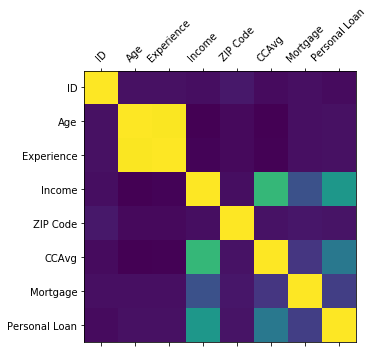

In [24]:
# Plot correlation between the continous variables
corr = custDf.corr()

fig, ax = plot.subplots(figsize=(15,5));
ax.matshow(custDf.corr());
plot.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plot.yticks(range(len(corr.columns)), corr.columns)

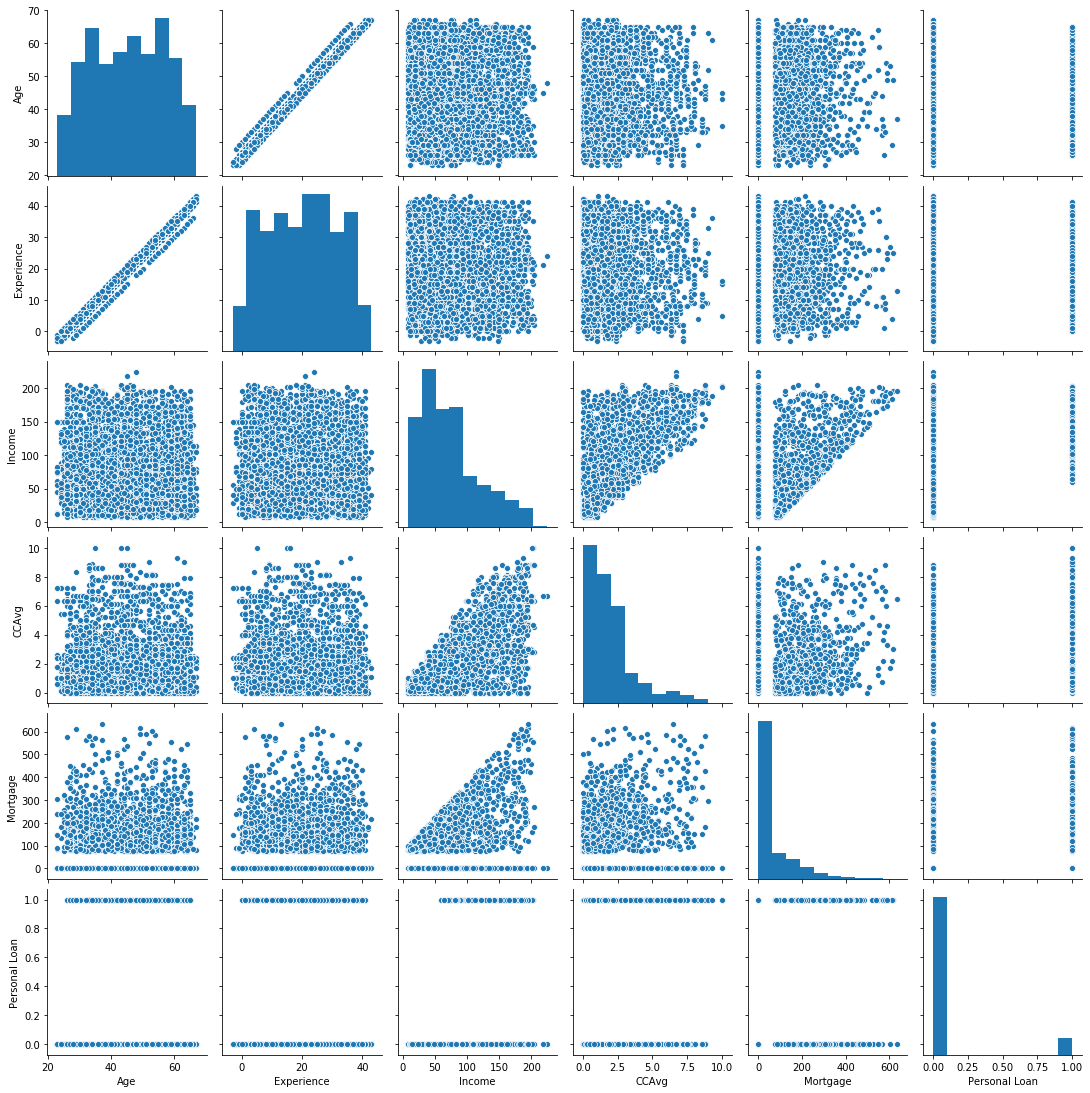

In [25]:
# Drop the categorical variables, ID and zip code and do a pair plot
dfCopy = custDf.drop(['ID','ZIP Code','Securities Account','CD Account','Online','CreditCard','Education','Family'],axis=1)
sns.pairplot(dfCopy)

### Find the cross relationship the target variable with other categorical values

In [26]:
pd.crosstab(custDf['CreditCard'],custDf['Personal Loan'])

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


In [27]:
pd.crosstab(custDf['CD Account'],custDf['Personal Loan'])

Personal Loan,0,1
CD Account,,
0,4358,340
1,162,140


In [28]:
pd.crosstab(custDf['Securities Account'],custDf['Personal Loan'])

Personal Loan,0,1
Securities Account,,
0,4058,420
1,462,60


In [29]:
pd.crosstab(custDf['Family'],custDf['Personal Loan'])

Personal Loan,0,1
Family,,
1,1365,107
2,1190,106
3,877,133
4,1088,134


### Bivariate analysis Insights

    1. Many of the variables does not make any significance (no variability) with personal loan like Securities Account, Family, Credit card etc, do we have to drop them?
    
    2. From the crosstabs, we found that customers who dont have any of the account like securities account/CD account and Creditcards are taking more personal loans.
    
    3. Number of family members does not have any impact on approval of personal loan.

## 2.6 Data preparation of analysis

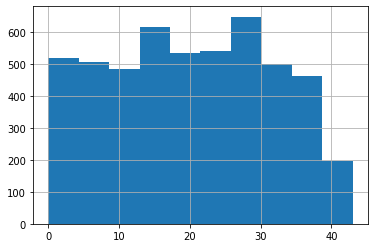

In [30]:
# insert the dummy variables for all the categorical variables
custDf = pd.get_dummies(custDf,drop_first=True)

#drop the zip code as it does not make any sense
custDf = custDf.drop(['ZIP Code'],axis =1)

# Univariate analysis shows that experince has some negative values
# change them to postive
negExpList = custDf.loc[custDf['Experience'] < 0].index
for i in negExpList:
    custDf.loc[i,'Experience'] = custDf.loc[i,'Experience'] * -1  

custDf['Experience'].hist()

## 3. Split the data into training and test set 

In [31]:
from sklearn.model_selection import train_test_split as DataSplit
X = custDf.drop(['Personal Loan'],axis =1)
Y = custDf['Personal Loan']

X_Train,X_Test,Y_Train,Y_Test= DataSplit(X,Y, test_size=0.30,random_state=2)


## 4. Logistic Regression Model

In [32]:
from sklearn.linear_model import LogisticRegression as LogReg
#logModel = LogReg(solver='liblinear')
logModel = LogReg(solver='lbfgs')

# fit the model
logModel.fit(X_Train,Y_Train)

# get the coefficient of variables and print
coeff = pd.DataFrame(logModel.coef_)
print(coeff)

# get the model and score and print it
score = logModel.score(X_Test,Y_Test)
print(score)

          0        1         2         3         4         5        6  \
0  0.000122 -0.43775  0.429432  0.057926  0.124381  0.001521 -1.62354   

          7         8         9        10        11        12        13  \
0  1.854735  1.696517  2.481391  2.887533  0.196141  2.129029 -0.517652   

         14  
0 -0.078188  
0.9453333333333334


C:\Users\babdulsa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [33]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
y_predict = logModel.predict(X_Test)    
y_predict[y_predict == 0].size

1404

In [34]:
# Comparing predicted loan status and observed loan status by adding them to dataframe
a = X_Test.copy()
a['Observed Loan Status'] = Y_Test
a['Predicted Loan Status'] = y_predict

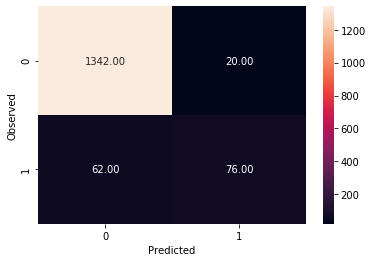

In [35]:
confMat = confusion_matrix(Y_Test,y_predict)
sns.heatmap(confMat, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
plot.ylabel('Observed')
plot.xlabel('Predicted')
plot.show()

In [36]:
print("Recall score = ",recall_score(Y_Test,y_predict))

Recall score =  0.5507246376811594


In [37]:
print("Precision = ", precision_score(Y_Test,y_predict))

Precision =  0.7916666666666666


In [38]:
print('AUC Score = ', roc_auc_score(Y_Test,y_predict))

AUC Score =  0.7680201749345591


# 5. Changing model parameters

In [39]:
metricDf = pd.DataFrame(columns=['Score','Recall','Precision', 'AUC', 'Solver'])

def LogisticRegCompute(df, solverChoice, resDf):
    lgModel = LogReg(solver=solverChoice,random_state=42, C = 0.75, penalty = 'l2')
    
    # fit the model
    lgModel.fit(X_Train,Y_Train)
    
    Y_Pred = lgModel.predict(X_Test)  
    
    # get the model and score and print it
    score        = lgModel.score(X_Test,Y_Test)
    recallScore  = recall_score(Y_Test,Y_Pred)
    precision    = precision_score(Y_Test,Y_Pred)
    aucScore     = roc_auc_score(Y_Test,Y_Pred)
    resDf = resDf.append({"Score":score,"Recall":recallScore,'Precision':precision,'AUC':aucScore,'Solver':solverChoice},ignore_index=True)
    return resDf
    
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solvers:
    metricDf = LogisticRegCompute(custDf,i,metricDf)
    
metricDf.set_index('Solver',inplace=True)
metricDf

C:\Users\babdulsa\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
C:\Users\babdulsa\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\babdulsa\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\babdulsa\Anaconda3\lib\site-pack

,Score,Recall,Precision,AUC
Solver,,,,
newton-cg,0.950000,0.572464,0.831579,0.780358
lbfgs,0.940000,0.521739,0.750000,0.752059
liblinear,0.946000,0.528986,0.820225,0.758619
sag,0.899333,0.166667,0.389831,0.570117
saga,0.896667,0.123188,0.333333,0.549113


### Insight:
    1. newtoncg solver seems to be better as its recall,precision and area under curve are better than other solvertypes.

# 6. Model Understanding

#### 1. Recall rate is very low with various solvers types. Meaning we may need more information to get better loan conversion rates.

#### 2. As seen in crosstab analysis, many of the predictor categorical variables does not have any big impact on whether the loan will be taken or not.

#### 3. Dropping few categorical columns which does not have any impact like Family and Security Account increases the recall score.

#### 4. Dropping mortgage also increases recall score.